# Model Assumes a Relationship


Linear Regression with two variables in one dimensional data

 
 
 $$ F(X)=X \times W $$
 $$ C=|| F(X) - Y ||_2^2 + \lambda ||W||_2^2$$

$X_{n \times k}$

$W_{k \times p}$

$Y_{n \times p}$   


 Linear Regression assumes:
 y =  wx + b
 Meaning:

 w (weight) decides how much x influences y

 b (bias/intercept) adjusts the line up/down

 The model tries to draw the best straight line through the data points.

# The Model Makes Predictions
 For any input x:
 prediction = wx + b

 if w =2,b=1;
 than x = 4   y= 2*4+1=9
 or y=16+c   than  hare  16/2  x= 4 basic sl formula 

# The Model Calculates Error
 Training means learning how wrong the model is.

 Error for each point:

 error=ypred − y

 Cost Function (MSE):  1/2m ∑ (ypred − y)^2


 Interpretation:

 If predictions are far → large error

 If predictions match → small error

 The model's goal = make this error as small as possible
 
# The Model Learns by Correcting Itself Gradient Descent

 This is the heart of how the model works.

 What does Gradient Descent do?

 It adjusts w and b in small steps:
  w = w − α (∂J​/∂w)
  b= b − α (∂J​/∂b)


 Where:
  α = learning rate
  Gradients = direction of error

 If prediction is too high → w decreases
 If prediction is too low → w increases

 It works like this:
  Model predicts something
  Calculates error
  Finds how to reduce error
  Moves weights a little
  Repeats thousands of times

 Finally → Finds the best line.

In [1]:
import numpy as np
import random
n, k, p=100, 8, 3 
X=np.random.random([n,k])
W=np.random.random([k,p])
Y=np.random.random([n,p])
max_itr=1000
alpha=0.0001
Lambda=0.01

Gradient is as follows:
$$ X^T 2 E + \lambda 2 W$$

In [2]:
# F(x)= w[0]*x + w[1]
def F(X, W):
    return np.matmul(X,W)

def cost(Y_est, Y, W, Lambda):
    E=Y_est-Y
    return E, np.linalg.norm(E,2)+ Lambda * np.linalg.norm(W,2)

def gradient(E,X, W, Lambda):
    return 2* np.matmul(X.T, E) + Lambda* 2* W

In [3]:
def fit(W, X, Y, alpha, Lambda, max_itr):
    for i in range(max_itr):
        
        Y_est=F(X,W)
        E, c= cost(Y_est, Y, W, Lambda)
        Wg=gradient(E, X, W, Lambda)
        W=W - alpha * Wg
        if i%100==0:
            print(c)
        
    return W

In [4]:
X=np.concatenate( (X, np.ones((n,1))), axis=1 ) 
W=np.concatenate( (W, np.random.random((1,p)) ), axis=0 )

W = fit(W, X, Y, alpha, Lambda, max_itr)

38.52639475771787
4.145642403134215
3.751959303273704
3.511235186734596
3.3682486314119817
3.2825115425951434
3.2292479503459073
3.194759210915952
3.171618948485405
3.155612646424403


To take into account for the biases, we concatenate X by a 1 column, and increase the number of rows in W by one

In [7]:
import numpy as np
import matplotlib.pyplot as plt

class LinearRegression:
    def __init__(self):
        self.weights = None
        self.bias = None
        self.loss_history = []
    
    def fit(self, X, y, learning_rate=0.01, epochs=1000):
        """
        Train the linear regression model
        
        Parameters:
        X: features (m samples x n features)
        y: target values
        learning_rate: how fast we update weights
        epochs: number of training iterations
        """
        
        # Convert to numpy arrays
        X = np.array(X)
        y = np.array(y)
        
        # Initialize weights and bias
        m, n = X.shape  # m samples, n features
        self.weights = np.zeros(n)
        self.bias = 0
        
        # Gradient descent
        for epoch in range(epochs):
            # Forward pass: make predictions
            y_pred = self.predict(X)
            
            # Calculate loss (Mean Squared Error)
            loss = np.mean((y_pred - y) ** 2)
            self.loss_history.append(loss)
            
            # Calculate gradients
            # dJ/dw = (1/m) * X.T @ (y_pred - y)
            # dJ/db = (1/m) * sum(y_pred - y)
            
            error = y_pred - y
            dw = (1/m) * X.T @ error
            db = (1/m) * np.sum(error)
            
            # Update parameters
            self.weights -= learning_rate * dw
            self.bias -= learning_rate * db
            
            if epoch % 100 == 0:
                print(f"Epoch {epoch}, Loss: {loss:.4f}")
    
    def predict(self, X):
        """Make predictions using current weights and bias"""
        X = np.array(X)
        return X @ self.weights + self.bias
    
    def score(self, X, y):
        """Calculate R-squared score"""
        y_pred = self.predict(X)
        ss_res = np.sum((y - y_pred) ** 2)
        ss_tot = np.sum((y - np.mean(y)) ** 2)
        return 1 - (ss_res / ss_tot)

In [8]:
# Generate sample data
np.random.seed(42)
X_simple = np.linspace(0, 10, 100).reshape(-1, 1)
y_simple = 2 * X_simple.flatten() + 1 + np.random.normal(0, 1, 100)

# Create and train model
model = LinearRegression()
model.fit(X_simple, y_simple, learning_rate=0.01, epochs=1000)

print(f"Final weights: {model.weights}")
print(f"Final bias: {model.bias:.4f}")
print(f"R-squared: {model.score(X_simple, y_simple):.4f}")

Epoch 0, Loss: 154.0185
Epoch 100, Loss: 0.8555
Epoch 200, Loss: 0.8396
Epoch 300, Loss: 0.8299
Epoch 400, Loss: 0.8240
Epoch 500, Loss: 0.8205
Epoch 600, Loss: 0.8183
Epoch 700, Loss: 0.8170
Epoch 800, Loss: 0.8162
Epoch 900, Loss: 0.8157
Final weights: [2.02021756]
Final bias: 0.7845
R-squared: 0.9769


In [9]:
# Generate multi-feature data
np.random.seed(42)
X_multi = np.random.randn(100, 3)  # 100 samples, 3 features
true_weights = np.array([1.5, -2.0, 0.8])
true_bias = 2.0
y_multi = X_multi @ true_weights + true_bias + np.random.normal(0, 0.5, 100)

# Train model
model_multi = LinearRegression()
model_multi.fit(X_multi, y_multi, learning_rate=0.01, epochs=1000)

print("True weights:", true_weights)
print("Learned weights:", model_multi.weights)
print("True bias:", true_bias)
print("Learned bias:", model_multi.bias)

Epoch 0, Loss: 13.4466
Epoch 100, Loss: 1.3741
Epoch 200, Loss: 0.3187
Epoch 300, Loss: 0.2081
Epoch 400, Loss: 0.1929
Epoch 500, Loss: 0.1901
Epoch 600, Loss: 0.1894
Epoch 700, Loss: 0.1893
Epoch 800, Loss: 0.1892
Epoch 900, Loss: 0.1892
True weights: [ 1.5 -2.   0.8]
Learned weights: [ 1.45972504 -2.02513554  0.74589306]
True bias: 2.0
Learned bias: 2.0567567276886574


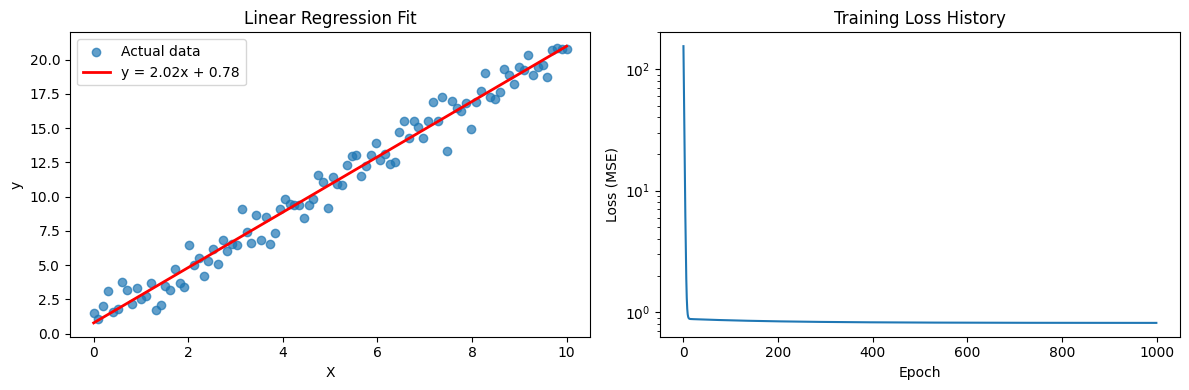

In [10]:
def plot_results(model, X, y):
    """Plot regression results and loss history"""
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    
    # Plot regression line
    ax1.scatter(X.flatten(), y, alpha=0.7, label='Actual data')
    
    # Sort for nice line plotting
    sorted_indices = np.argsort(X.flatten())
    X_sorted = X[sorted_indices]
    y_pred_sorted = model.predict(X_sorted)
    
    ax1.plot(X_sorted.flatten(), y_pred_sorted, 'r-', linewidth=2, 
             label=f'y = {model.weights[0]:.2f}x + {model.bias:.2f}')
    ax1.set_xlabel('X')
    ax1.set_ylabel('y')
    ax1.legend()
    ax1.set_title('Linear Regression Fit')
    
    # Plot loss history
    ax2.plot(model.loss_history)
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Loss (MSE)')
    ax2.set_title('Training Loss History')
    ax2.set_yscale('log')
    
    plt.tight_layout()
    plt.show()

# Plot for simple linear regression
plot_results(model, X_simple, y_simple)

In [11]:
class RidgeRegression(LinearRegression):
    """Linear regression with L2 regularization"""
    
    def fit(self, X, y, learning_rate=0.01, epochs=1000, alpha=0.1):
        """Alpha is regularization strength"""
        X = np.array(X)
        y = np.array(y)
        
        m, n = X.shape
        self.weights = np.zeros(n)
        self.bias = 0
        self.loss_history = []
        
        for epoch in range(epochs):
            y_pred = self.predict(X)
            loss = np.mean((y_pred - y) ** 2) + alpha * np.sum(self.weights ** 2)
            self.loss_history.append(loss)
            
            error = y_pred - y
            dw = (1/m) * X.T @ error + (2 * alpha * self.weights) / m
            db = (1/m) * np.sum(error)
            
            self.weights -= learning_rate * dw
            self.bias -= learning_rate * db

# Test ridge regression
ridge_model = RidgeRegression()
ridge_model.fit(X_simple, y_simple, alpha=0.1)